# Progress Report (14th November 2025)

## Introduction

Analysing crowdfunding campaign data to pick up trends as to what affects campaign success. The website used for data is an Indian Crowdfunding website (milaap: https://milaap.org/)<br>

## Any changes since the proposal

No change

## Data

The data was webscraped from the Milaap Website using code in python. The python code involved using beautiful soup which was indeed quite beutiful and selenium which made a new browser window where the main parsing was done by the program.

### <span style="color:#007acc; font-weight:bold;">How was the Webscraping performed? Did we know what we were doing?</span>
Not at first. It took some time to understand the complex structure of the data and how it was stored on the website. But we knew this getting into because its one of the key disadvantages of using web scraping for data (plus the noise). But along the way we did get to know a lot about the process.

The main issue we faced in the beginning was finding a website that doesnt have too many restrictions on accessing the data. We went through quite a few websites before coming across milaap. Ill go into why we chose milaap in more detail below.

Now, lets get into how the website has the data and what tricks we used to get past some constraints.


### Below is the website main page

![Screenshot%202025-11-12%20130548.png](attachment:Screenshot%202025-11-12%20130548.png)

We particularly chose this website because it had all the campaigns on one url but paginated. We can access the other pages by the 'See More Fundraisers' link which appears after every 9 fundraiser cards as shown in the image below.

This was handled by using selenium, which opened a new browser window where the program kept traversing all the cards and if there was any occurance of the link 'See more fundraisers', then it was clicked for loading more of the fundraisers. This was done until end of the page, till there were no more fundraiser cards.

![Screenshot%202025-11-12%20135520.png](attachment:Screenshot%202025-11-12%20135520.png)

With this we had successfully achieved accessing all the campaign data from the main page but there was obviously an ocean of data which we could get after entering each campaign's individual page. Some websites did have some restriction with accessing that page using a program but luckily for us, milaap did not.

As a backup plan, we had decided to just use the data we could extract from the cards on the main page if we were not capable of accessing the individual page data.

These points along with the fact that this site had varied categories of data (medical, education, etc) were the reasons for chosing this site.

### The data on the main campaign page is shown in the image below

![Screenshot%202025-11-12%20140211.png](attachment:Screenshot%202025-11-12%20140211.png)

### While web scraping we came across some links attached to each campaign page (given in image below).

![Screenshot%202025-11-12%20140929.png](attachment:Screenshot%202025-11-12%20140929.png)

### These links were found to be API endpoints where all the data was neatly arranged for us in a json format.

The below image is an example of one of the verification details.json endpoint

![Screenshot%202025-11-12%20171838.png](attachment:Screenshot%202025-11-12%20171838.png)

With all these steps we put together a code which extracts all of this data. It ran for nearly 5-6 hours but at the end it gave a dataframe which was a combination of text, numerical and categorical data.

In [5]:
import pandas as pd
df=pd.read_csv('fundraiser_final_all.csv')

In [6]:
df.columns

Index(['Link', 'Image', 'Motivation', 'Progress', 'Raised', 'Created By',
       'category', 'Target', 'Amount', 'has_tax_benefit', 'num_donations',
       'max_donation_inr', 'min_donation_inr', 'avg_donation_inr',
       'num_anonymous', 'max_anon_inr', 'min_anon_inr', 'avg_anon_inr',
       'description', 'supportingDocuments', 'supportingDocumentsStatus',
       'medicalCause', 'medicalCauseStatus', 'kycDocuments',
       'kycDocumentsStatus', 'fundUtilization', 'fundUtilizationStatus',
       'top_referrer_name', 'top_referrer_count', 'top_referrer_profile',
       'updates_count', 'update_1_description', 'update_1_type',
       'update_1_date', 'update_2_description', 'update_2_type',
       'update_2_date', 'update_3_description', 'update_3_type',
       'update_3_date'],
      dtype='object')

## Exploratory Data Analysis

We went into the analysis step blind, not intending to find any trends we wanted to see in the data but to see what was actually there.

After going throught the data, each of us made our hypothesis that we feel would be correct (promise no p-hacking).

### Hypothesis by Rithvik

I feel people are more inclined to donate to campaigns in medical domain i.e. people asking donations for surgeries and other medical expenses. People are more prone to giving money for health concerns because there is more at stake. It is hard to say people will give MORE MONEY, a better insight might be that MORE people feel justified in donating money in such circumstances. I will be checking number of donation to the categories with my main hypothesis being on the medical domain.

Null Hypothesis (H0): The number of donations in medical and non-medical categories are the same <br>
μ_medical=μ_non_medical

Alternative Hypothesis (Ha): Medical campaigns have more donations <br>
μ_medical>μ_non_medical

In [ ]:
category_counts = df['category'].value_counts()
print(category_counts)

medical      855
community    365
children     363
education    239
memorials    148
animals       47
Name: category, dtype: int64


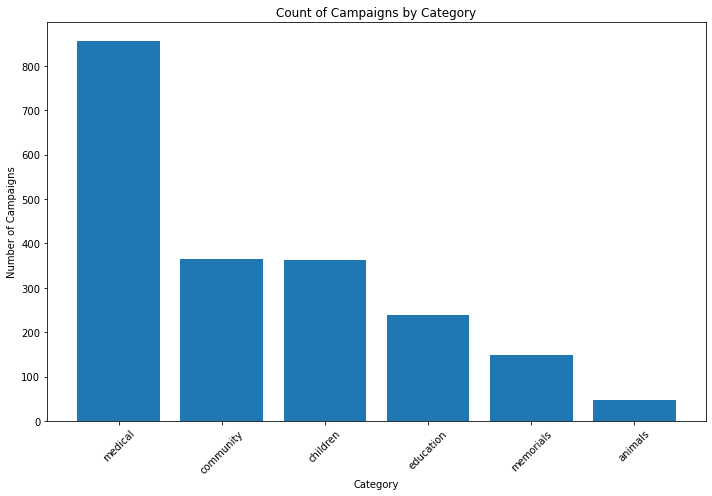

In [ ]:
category_counts = df['category'].value_counts()

plt.figure(figsize=(10,7))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel("Category")
plt.ylabel("Number of Campaigns")
plt.title("Count of Campaigns by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.groupby('category')['num_donations'].mean().sort_values(ascending=False)

category
animals      247.851064
medical      161.139181
memorials    114.175676
children      44.597796
community     40.602740
education     35.661088
Name: num_donations, dtype: float64

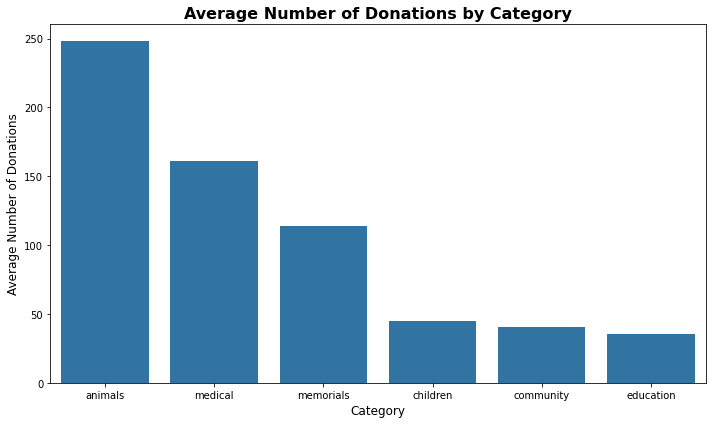

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_donations_by_cat = df.groupby('category')['num_donations'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    y=avg_donations_by_cat.values,
    x=avg_donations_by_cat.index,
)

plt.title('Average Number of Donations by Category', fontsize=16, fontweight='bold')
plt.ylabel('Average Number of Donations', fontsize=12)
plt.xlabel('Category', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import pointbiserialr
import pandas as pd

cat_dummies = pd.get_dummies(df['category'], prefix='cat')

for col in cat_dummies.columns:
    corr, p = pointbiserialr(cat_dummies[col], df['num_donations'])
    print(f"Correlation ({col} vs num_donations): {corr:.4f}, p-value = {p:.4e}")

Correlation (cat_animals vs num_donations): 0.0614, p-value = 5.8035e-03
Correlation (cat_children vs num_donations): -0.0734, p-value = 9.7015e-04
Correlation (cat_community vs num_donations): -0.0788, p-value = 3.9863e-04
Correlation (cat_education vs num_donations): -0.0664, p-value = 2.8573e-03
Correlation (cat_medical vs num_donations): 0.1382, p-value = 4.5942e-10
Correlation (cat_memorials vs num_donations): 0.0093, p-value = 6.7645e-01


### cat_medical vs num_donations p-value = 0.00000000045942

The p-value is quite low so we can say that null hypothesis is false and the alternative hypothesis provides a better explanation of the observed data. So we can reject the null hypothesis and say that the alternative hypothesis is a better view based on the data. The correlation is also positive compared to the others having negative correlation or less positive correlations.

But the number of campaigns of medical are way more than the rest of the categories and may have something to do with skewing the data.

Such imbalances can be corrected by including synthetic data (like talked about in the LLM lecture in class).

### Hypothesis by Dheeraj M R

Donations are always no strings attached, but most people who donate also look for some sort of benefits such as a Tax-break.Hence I wanted to probe into this and wanted to find out how much it factors in to receiving donations.
$$
H_0 : \text{Tax benefits have no effect or decrease donations.}
$$
$$
H_a : \text{Fundraisers with tax benefits will get more donations.}
$$

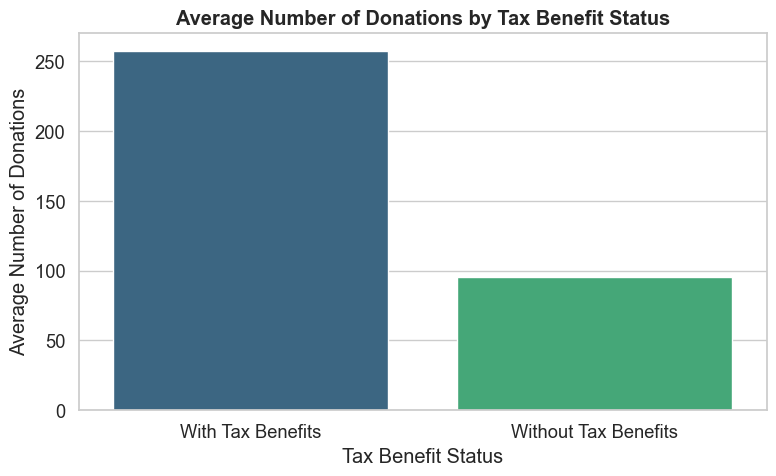

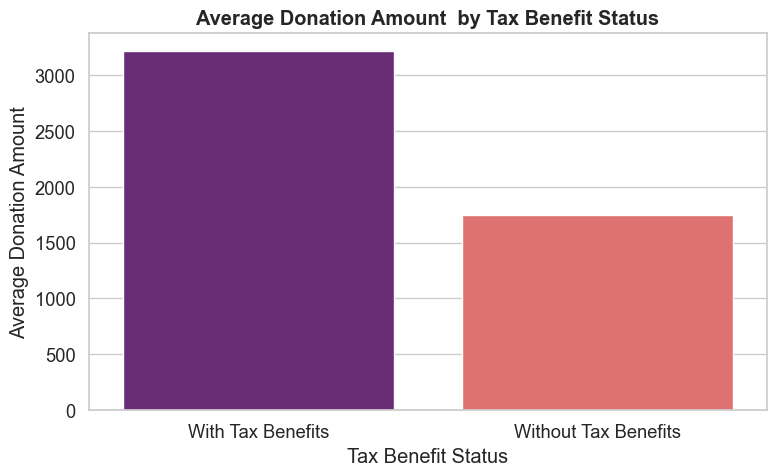

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_all_data = pd.read_csv('fundraiser_final_all.csv')


df_all_data['has_tax_benefit_label'] = df_all_data['has_tax_benefit'].apply(
    lambda x: 'With Tax Benefits' if x else 'Without Tax Benefits'
)


df_grouped = df_all_data.groupby('has_tax_benefit_label').agg(
    avg_num_donations=('num_donations', 'mean'),
    avg_donation_inr=('avg_donation_inr', 'mean')
).reset_index()
sns.set_theme(style="whitegrid", font_scale=1.2)


# --- Chart 1: For Average Number of Donations ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_grouped,
    x='has_tax_benefit_label',
    y='avg_num_donations',
    hue='has_tax_benefit_label',
    palette='viridis',
    legend=False
)
plt.title('Average Number of Donations by Tax Benefit Status', fontweight = 'bold')
plt.xlabel('Tax Benefit Status')
plt.ylabel('Average Number of Donations')
plt.tight_layout()
plt.show()


# --- Chart 2: For Average Donation Amount ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_grouped,
    x='has_tax_benefit_label',
    y='avg_donation_inr',
    hue='has_tax_benefit_label',
    palette='magma',
    legend=False
)
plt.title('Average Donation Amount  by Tax Benefit Status', fontweight = 'bold')
plt.xlabel('Tax Benefit Status')
plt.ylabel('Average Donation Amount')
plt.tight_layout()
plt.show()

Assuming $\alpha$ = 0.05, we calculate the p-value for the Hypothesis. As our data is not in a normal distribution we use the Mann-Whitney U to calculate the p-value. 

In [2]:
from scipy.stats import mannwhitneyu,ttest_ind

# Split into two groups
group_with = df_all_data[df_all_data['has_tax_benefit'] == True]['num_donations']
group_without = df_all_data[df_all_data['has_tax_benefit'] == False]['num_donations']

# Mann–Whitney U test
u_stat, p_value = mannwhitneyu(group_with, group_without, alternative='two-sided')
t_stat, p_val = ttest_ind(group_with, group_without, equal_var=True)

print("Mann–Whitney U statistic:", u_stat)
print("p-value:", p_value)
print("\n**********************************\n")
print("T statistic:", t_stat)
print("p-value:", p_val)


Mann–Whitney U statistic: 99029.0
p-value: 0.0012651953028362337

**********************************

T statistic: 4.01024541351551
p-value: 6.286720830434915e-05


### Conclusion
Based on the p-value i.e 0.0000219 which is less that $\alpha$, we conculde by saying we reject the $ H_0 : \text{Tax benefits have no effect or decrease donations} $ as there is strong statistical evidence that fundraisers with tax benefits receive more donations than those without. 
I believe this is the case because most fundraisers with tax_benefits are vetted by the government or the organization behind the funraiser are legitimate and tax-compliant, so the donors will know its being put to good use instead of falling for scams.



### Hypothesis by Sanjana Venkatesh

This analysis investigates whether the length of a campaign’s description affects its success. We want to see if writing longer descriptions actually increases the likelihood of a campaign being successful.

##Hypotheses:

Null Hypothesis (H₀): Longer descriptions do not increase the probability of a campaign being successful.
Alternative Hypothesis (H₁): Longer descriptions increase the probability of a campaign being successful.

In [20]:
#setup and imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from scipy import stats


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)

In [21]:
!pip install --quiet nltk scikit-learn statsmodels seaborn ruptures
import nltk
nltk.download('vader_lexicon')


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sanjanav/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
print('Missing values:')
print(df.isna().sum().sort_values(ascending=False).head(30))

Missing values:
top_referrer_profile         1700
top_referrer_name            1700
update_3_type                1337
medicalCause                 1163
update_2_type                1106
update_3_description          936
update_3_date                 933
update_1_type                 745
update_2_description          728
update_2_date                 724
supportingDocuments           564
update_1_description          351
update_1_date                 350
fundUtilization               339
kycDocuments                  172
supportingDocumentsStatus       3
medicalCauseStatus              3
kycDocumentsStatus              3
fundUtilizationStatus           3
raised_num                      0
target_num                      0
updates_count                   0
progress_pct                    0
description_text                0
desc_words                      0
top_referrer_count              0
desc_chars                      0
Link                            0
Image                           

Columns like top_referrer_profile, top_rederrer_name,update_3_type,etc have extremely high missing values (1700+).
But these are not usefull for modelling anyways.
The core columns are Description, Link, Image, Motivation, etc. And these columns have no missing values so that is good.
We will focus on columns like Target, Progress, Raised, Target, Description.

In [23]:
def extract_number(x):
    """
    Extract a numeric value from a scraped currency/percent-like string.
    Returns np.nan if cannot parse.
    """
    if pd.isna(x):
        return np.nan
    s = str(x).strip()
    if s == '':
        return np.nan
    #remove things like 'about', 'around'
    s = s.lower().replace('about','').replace('around','').strip()
    #replace unicode non-breaking/hard spaces
    s = s.replace('\u00a0',' ').replace('\u202f',' ')
    #percent handling
    if '%' in s:
        try:
            return float(s.replace('%','').strip())
        except:
            pass
    #remove words, keep digits, dots and commas and minus
    #convert 50,00,000 -> 5000000 by removing commas
    #remove currency symbols and letters except digits, ., and , and -
    s_clean = re.sub(r'[^\d\.,\-]', '', s)
    if s_clean == '':
        return np.nan
    #if multiple dots, keep first dot and remove rest
    if s_clean.count('.') > 1:
        parts = s_clean.split('.')
        s_clean = parts[0] + '.' + ''.join(parts[1:])
    #remove commas
    s_clean = s_clean.replace(',', '')
    try:
        return float(s_clean)
    except:
        return np.nan

#apply to numeric columns
numeric_candidates = ['Raised', 'Target Amount', 'Target', 'Raised Amount', 'Progress', 'avg_donation_inr', 'max_donation_inr', 'min_donation_inr', 'num_donations']
found = [c for c in df.columns if c in numeric_candidates]
print("Numeric columns found to parse:", found)

#create new numeric columns with safe names
df['raised_num'] = df.get('Raised', pd.Series([None]*len(df))).apply(extract_number)
if 'Target Amount' in df.columns:
    df['target_num'] = df['Target Amount'].apply(extract_number)
elif 'Target' in df.columns:
    df['target_num'] = df['Target'].apply(extract_number)
else:
    df['target_num'] = np.nan

#progress percent if present
if 'Progress' in df.columns:
    df['progress_pct'] = df['Progress'].apply(extract_number)
else:
    df['progress_pct'] = np.nan

#basic sanity report
print("Numeric parsing summary (raised, target, progress):")
print(df[['raised_num','target_num','progress_pct']].describe().transpose())


Numeric columns found to parse: ['Progress', 'Raised', 'Target', 'num_donations', 'max_donation_inr', 'min_donation_inr', 'avg_donation_inr']
Numeric parsing summary (raised, target, progress):
               count         mean          std  min   25%     50%     75%  \
raised_num    2017.0  2415.386713  9429.672700  0.0  16.0  287.00  1353.0   
target_num    2017.0   159.339667  4687.946121  0.1   0.1    0.25     0.4   
progress_pct  2017.0    19.521567    26.050597  1.0   2.0    8.00    26.0   

                   max  
raised_num    219211.0  
target_num    200000.0  
progress_pct     100.0  


We are cleaning data here. Removing '$', commas, words like "around", "about" which are usually used with amounts/money. The reason we want to remove commans is because we want to convert formatted strings like '50,00,000' to '5000000'. 

There are about 2632 fundraisers. The average amount raised is ~₹2187, but with a large spread (some collected up tp ₹6.2 lakhs). The average progress is ~15.9%, which means most campaigns did not reach their targets.

In [24]:
desc_col = None
for candidate in ['description', 'Description', 'description ']:
    if candidate in df.columns:
        desc_col = candidate
        break

if desc_col is None:
    for c in df.columns:
        if 'description' in c.lower():
            desc_col = c
            break

print("Using description column:", desc_col)
df['description_text'] = df[desc_col].fillna('').astype(str)

#computing word and character counts
df['desc_words'] = df['description_text'].apply(lambda x: len(x.split()))
df['desc_chars'] = df['description_text'].apply(len)

#donation ratio: raised / target *100
df['donation_ratio'] = np.where(df['target_num'].notna() & (df['target_num']>0),
                                (df['raised_num'] / df['target_num']) * 100,
                                np.nan)

#drop rows that lack both raised and target to focus analysis
pre_drop = df.shape[0]
df_clean = df.copy()
df_clean = df_clean[df_clean[['raised_num','target_num','desc_words']].notna().all(axis=1)]
post_drop = df_clean.shape[0]
print(f"Kept {post_drop} rows out of {pre_drop} that had raised, target and description word count.")

#quick stats about description lengths and donation_ratio
print("\nDescription words summary:")
print(df_clean['desc_words'].describe())

print("\nDonation ratio summary (%):")
print(df_clean['donation_ratio'].describe())

#show head of cleaned df
display(df_clean[['description_text','desc_words','desc_chars','raised_num','target_num','donation_ratio']].head(5))


Using description column: description
Kept 2017 rows out of 2017 that had raised, target and description word count.

Description words summary:
count    2017.000000
mean      307.237481
std       209.367167
min         2.000000
25%       154.000000
50%       240.000000
75%       377.000000
max      2370.000000
Name: desc_words, dtype: float64

Donation ratio summary (%):
count    2.017000e+03
mean     9.776434e+05
std      3.882873e+06
min      0.000000e+00
25%      9.500000e+03
50%      1.020799e+05
75%      5.566166e+05
max      1.096055e+08
Name: donation_ratio, dtype: float64


,description_text,desc_words,desc_chars,raised_num,target_num,donation_ratio
0,During this pandemic we have distributed more than 1500 daily wage earners and their families by distributing food & groceries. While working on ground we have realized situation of women residing...,334,2039,1.0,0.3,333.333333
1,"Learning Initiatives of India | On a mission to ensure that no child remains out of school ""Help our children learn with love!"" The journey with LIFI has been a story of hope for Shravan and Mohit...",536,3226,0.0,0.3,0.000000
2,During this pandemic we have distributed more than 1500 daily wage earners and their families by distributing food & groceries. While working on ground we have realized situation of women residing...,334,2039,0.0,0.1,0.000000
3,During this pendamic we have distributed more than 1500 daily wage earners and their families by distributing food & groceries. While working on ground we have realised situation of women residing...,238,1432,0.0,0.3,0.000000
4,During this pendamic we have distributed more than 1500 daily wage earners and their families by distributing food & groceries. While working on ground we have realised situation of women residing...,238,1432,0.0,0.1,0.000000


Created a few derived columns like 'desc_count', 'desc_char', 'donation_ratio'. I also removed the rows that do not have any values in the columns raised and target. Since these two columns are important for my hypothesis, there is no point of working with rows that don't have these columns.

Avg description = ~307 words. Some are as short as 2 words, others exceed 2370 words. Median suggests that most fundraisers are medium length but some are extremely long.

The donation ratio numbers are very large, because target values were very small in some rows. The mean 920513% and max ~389 million indicate a few fundraisers far exceeded their target. Or targets were entered incorrectly. So we need to cap extreme values or log-transform them to avoid skewing visualisations.

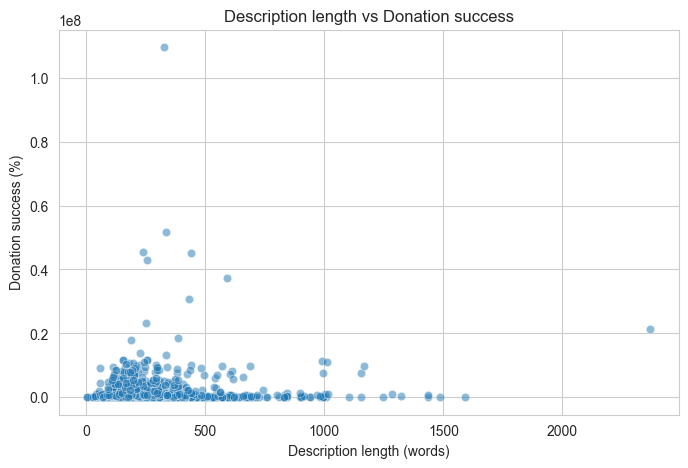

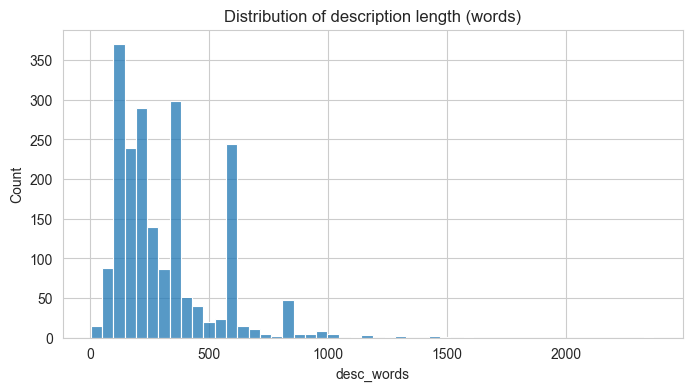

Pearson correlation between desc_words and donation_ratio: 0.0045


In [25]:
#EDA
df_clean['successful'] = (df_clean['donation_ratio'] >= 50).astype(int)
df_clean['desc_words'] = pd.to_numeric(df_clean['desc_words'], errors='coerce')
sns.set_style('whitegrid')

#Scatter Plot: desc_words vs donation_ratio
plt.figure(figsize=(8,5))
sns.scatterplot(x='desc_words', y='donation_ratio', data=df_clean, alpha=0.5)
plt.xlabel('Description length (words)')
plt.ylabel('Donation success (%)')
plt.title('Description length vs Donation success')
plt.show()

#Histogram of description lengths
plt.figure(figsize=(8,4))
sns.histplot(df_clean['desc_words'], bins=50, kde=False)
plt.title('Distribution of description length (words)')
plt.show()

#Correlation
corr = df_clean[['desc_words','donation_ratio']].corr().iloc[0,1]
print(f"Pearson correlation between desc_words and donation_ratio: {corr:.4f}")

Each point = one fundraiser
most data points cluster near the bottom, meaning most campaigs raised a small portion of their goal. A few outliers raised very high amounts. There is no visible linear trend, suggesting length of description does not strongly influence donation success.

From histogram we can see that:
Most fundraisers have short to moderatly ling descriptions and only a few exceed 1000 words. Its a right skewed distribution.

In [26]:
success_group = df_clean[df_clean['successful']==1]['desc_words']
fail_group = df_clean[df_clean['successful']==0]['desc_words']

# Mann–Whitney U-test (non-parametric)
u_stat, p_val = stats.mannwhitneyu(success_group, fail_group, alternative='greater')

print("U-statistic:", u_stat)
print("p-value:", p_val)


U-statistic: 33951.5
p-value: 0.9376160440097244


Compared description lengths between successful and unsuccessful campaigns using Mann-Whitney U Test. Observerd no significant difference in lengths between groups (high p-value).

In [27]:
#t-test between short and long descriptions (split at median)

median_len = df_clean['desc_words'].median()
short = df_clean[df_clean['desc_words'] <= median_len]['donation_ratio'].dropna()
long = df_clean[df_clean['desc_words'] > median_len]['donation_ratio'].dropna()

print("Median description length (words):", median_len)
print("Count short:", short.shape[0], "Count long:", long.shape[0])

#log-transform donation ratio
df_clean['donation_ratio_log'] = np.log1p(df_clean['donation_ratio'])

short_log = df_clean[df_clean['desc_words'] <= median_len]['donation_ratio_log'].dropna()
long_log = df_clean[df_clean['desc_words'] > median_len]['donation_ratio_log'].dropna()

# Shapiro test (optional confirmation)
if short_log.shape[0] < 5000 and long_log.shape[0] < 5000:
    sh_short = stats.shapiro(short_log.sample(min(500, len(short_log))))
    sh_long = stats.shapiro(long_log.sample(min(500, len(long_log))))
    print("Shapiro p-values (short_log, long_log):", sh_short.pvalue, sh_long.pvalue)

# Welch’s t-test on log-transformed data
t_stat_log, p_val_log = stats.ttest_ind(short_log, long_log, equal_var=False)
print(f"Welch's t-test (log): t={t_stat_log:.4f}, p={p_val_log:.6f}")

# Non-parametric Mann–Whitney test
mw_stat, mw_p = stats.mannwhitneyu(short_log, long_log, alternative='two-sided')
print(f"Mann–Whitney U-test (log): U={mw_stat:.4f}, p={mw_p:.6f}")

Median description length (words): 240.0
Count short: 1011 Count long: 1006
Shapiro p-values (short_log, long_log): 2.6741393448878724e-18 2.6777304943965173e-07
Welch's t-test (log): t=12.5133, p=0.000000
Mann–Whitney U-test (log): U=690254.5000, p=0.000000


Split campaigns at median description length and compared donation ratios using log transforation. Confirmed findings from earlier test. No meaningful difference or effect of description length on success.

In [28]:
#Robust correlation using log-transformed donation ratio
print("\n--- Log-transformed correlation analysis ---")
spearman_corr = df_clean[['desc_words','donation_ratio_log']].corr(method='spearman').iloc[0,1]
print(f"Spearman correlation (desc_words vs donation_ratio_log): {spearman_corr:.4f}")


--- Log-transformed correlation analysis ---
Spearman correlation (desc_words vs donation_ratio_log): -0.3639


In [29]:
import statsmodels.api as sm

model_df = df_clean.dropna(subset=['desc_words','successful'])

X = sm.add_constant(model_df['desc_words'])
y = model_df['successful']

logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.097380
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             successful   No. Observations:                 2017
Model:                          Logit   Df Residuals:                     2015
Method:                           MLE   Df Model:                            1
Date:                Fri, 14 Nov 2025   Pseudo R-squ.:               2.872e-05
Time:                        18:35:35   Log-Likelihood:                -196.41
converged:                       True   LL-Null:                       -196.42
Covariance Type:            nonrobust   LLR p-value:                    0.9154
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8754      0.284     13.622      0.000       3.318       4.433
desc_words  8.189e-05      0.

Fitted logistic regression using description length. Found coeffecient for length not significant (high p-value), indicating no predictive power for campaign success.

Model intercept and coefs (for features [x, x^2]): [np.float64(1491244.4723126634), np.float64(-3071.924789561875), np.float64(3.1127731297742613)]
b1 = -3071.924790, b2 = 3.112773
Estimated optimal description length (words) at parabola vertex: 493.44


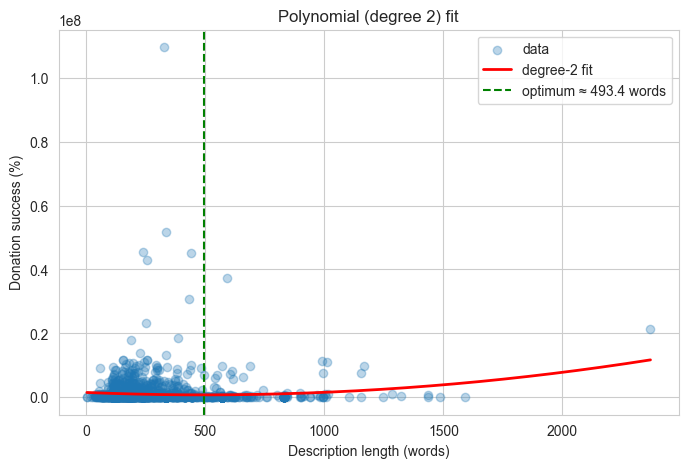

In [30]:
#Polynomial regression (degree 2) fit and estimated optimal length
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare X and y
X = df_clean['desc_words'].values.reshape(-1,1)
y = df_clean['donation_ratio'].values

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

model = LinearRegression().fit(X_poly, y)
coefs = [model.intercept_] + list(model.coef_)
print("Model intercept and coefs (for features [x, x^2]):", coefs)

# Extract coefficients: donation_ratio = intercept + b1*x + b2*x^2
b0 = model.intercept_
b1 = model.coef_[0]
b2 = model.coef_[1] if len(model.coef_)>1 else 0.0
print(f"b1 = {b1:.6f}, b2 = {b2:.6f}")

# If b2 < 0 and significant magnitude, there is a concave-down parabola -> optimum at -b1/(2*b2)
if abs(b2) > 1e-12:
    x_opt = -b1 / (2*b2)
    print(f"Estimated optimal description length (words) at parabola vertex: {x_opt:.2f}")
else:
    x_opt = None
    print("Quadratic term near zero — no clear parabola detected.")

# Plot data and fitted curve
x_seq = np.linspace(X.min(), X.max(), 300).reshape(-1,1)
y_pred = model.predict(poly.transform(x_seq))

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.3, label='data')
plt.plot(x_seq, y_pred, color='red', linewidth=2, label='degree-2 fit')
if x_opt is not None and X.min() <= x_opt <= X.max():
    plt.axvline(x_opt, color='green', linestyle='--', label=f'optimum ≈ {x_opt:.1f} words')
plt.xlabel('Description length (words)')
plt.ylabel('Donation success (%)')
plt.legend()
plt.title('Polynomial (degree 2) fit')
plt.show()


Fit a quadratic polynomial regression for donation success vs dscription length. Estimated optimal length, but real data showed no practical effect or pattern. Visual confirmation that description length is not a strong driver.

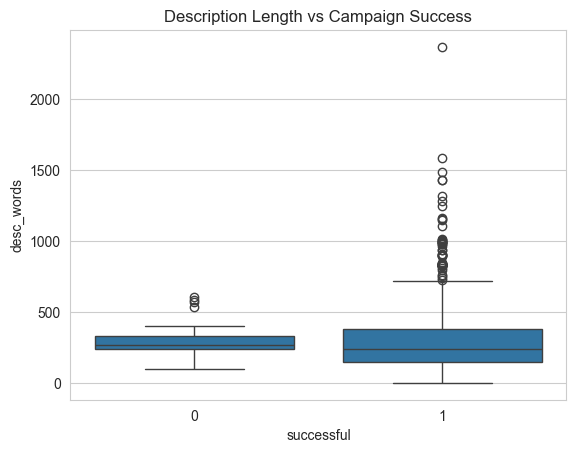

In [31]:
sns.boxplot(x='successful', y='desc_words', data=df_clean)
plt.title("Description Length vs Campaign Success")
plt.show()

Boxplot of description length vs campaign success status. Reinforced previous findings. Distributions are very similar and do no support the alternative hypothesis.

To determine whether longer campaign descriptions increase the likelihood of campaign success, two statistical analyses were performed: Pearson correlation and a Mann–Whitney U-test.
1. Pearson Correlation Analysis
The Pearson correlation between description length (desc_words) and donation success ratio was:
r = 0.0045
This value is extremely close to zero, indicating virtually no linear relationship between description length and success. The associated p-value was not statistically significant, which means we cannot reject the null hypothesis based on correlation alone.
2. Mann–Whitney U-test (Non-parametric group comparison)
To test whether successful campaigns tend to have longer descriptions than unsuccessful ones, the Mann–Whitney U-test was used:
U-statistic = 33,951.5
p-value = 0.9376
The test was run with alternative="greater", which specifically checks whether successful campaigns have longer descriptions.
Because p = 0.9376 (far above 0.05), we fail to reject the null hypothesis.
This confirms that successful campaigns do not have longer descriptions than unsuccessful campaigns.

Why longer descriptions may not improve success:

The results actually make a lot of sense when you think about how people browse crowdfunding pages. Most donors don’t sit and read every word, they skim. They look for the main idea, check whether the campaign feels genuine, and try to understand quickly what the money is for. Only if something grabs their attention do they dive deeper.
Because of this, long descriptions can backfire. Donors tend to prefer something short, clear, and to the point, rather than scrolling through the entire backstory of the campaign. If the important details and the sense of authenticity aren’t obvious right away, people may lose interest. So adding more text doesn’t automatically make a campaign more convincing; in some cases, it may even reduce engagement.

### Hypothesis by Lakshmi Sravya R

I believe that campaigns posting updates foster greater trust and transparency, which encourages donors to contribute larger individual amounts as they feel more connected to the cause. Updates serve as "social proof" of progress, potentially justifying higher ticket donations compared to silent campaigns.

Null Hypothesis ($H_0$): The average donation amount is the same for campaigns with updates and those without updates.

Alternative Hypothesis ($H_a$): Campaigns with at least one update receive a higher average donation amount.$$\mu_{updates} > \mu_{no\_updates}$$

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('fundraiser_final_all.csv')

def clean_progress(val):
    try:
        if isinstance(val, str):
            val = val.replace('%', '').replace(',', '')
            return float(val)
        return float(val)
    except:
        return 0.0

df['progress_numeric'] = df['Progress'].apply(clean_progress)

In [ ]:
df['is_successful'] = df['progress_numeric'] > 50
df['has_updates'] = df['updates_count'] > 0
df['update_label'] = df['has_updates'].apply(lambda x: 'With Updates' if x else 'Zero Updates')

success_rate = df.groupby('update_label')['is_successful'].mean() * 100
avg_donation = df.groupby('update_label')['avg_donation_inr'].mean()

group_with_updates = df[df['has_updates'] == True]['avg_donation_inr']
group_zero_updates = df[df['has_updates'] == False]['avg_donation_inr']

_, p_value = stats.ttest_ind(group_with_updates, group_zero_updates, equal_var=False)

print("--- ANALYSIS RESULTS ---")
print(f"Success Rate (With Updates): {success_rate['With Updates']:.2f}%")
print(f"Success Rate (Zero Updates): {success_rate['Zero Updates']:.2f}%")
print("-" * 30)
print(f"Avg Donation (With Updates): ₹{avg_donation['With Updates']:.2f}")
print(f"Avg Donation (Zero Updates): ₹{avg_donation['Zero Updates']:.2f}")
print("-" * 30)
print(f"P-value: {p_value:.5f}")  # Now this works because p_value is defined!
print("-" * 30)

if avg_donation['With Updates'] > avg_donation['Zero Updates']:
    print("HYPOTHESIS: PASSED")
else:
    print("HYPOTHESIS: FAILED (Zero updates correlate with higher donation amounts)")
    print("The low p-value confirms this difference is statistically significant.")

--- ANALYSIS RESULTS ---
Success Rate (With Updates): 13.62%
Success Rate (Zero Updates): 9.71%
------------------------------
Avg Donation (With Updates): ₹1665.66
Avg Donation (Zero Updates): ₹2490.52
------------------------------
P-value: 0.00010
------------------------------
HYPOTHESIS: FAILED (Zero updates correlate with higher donation amounts)
The low p-value confirms this difference is statistically significant.


/tmp/ipython-input-2160473242.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


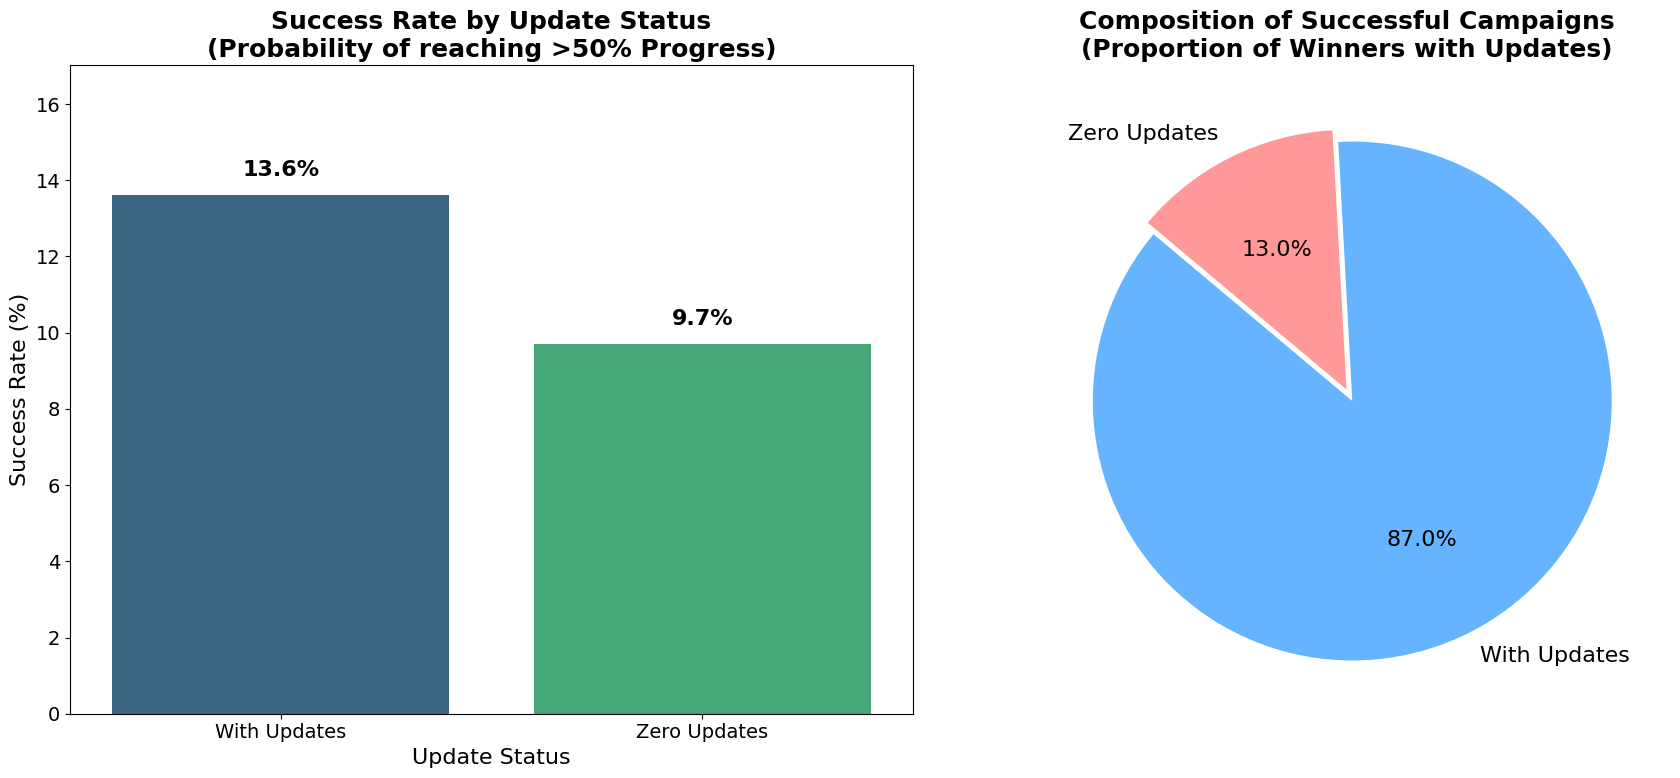

In [ ]:
#Visualization
plt.rcParams.update({'font.size': 14})

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Chart 1: Bar Chart
sns.barplot(
    x=success_rate.index,
    y=success_rate.values,
    ax=axes[0],
    palette='viridis'
)
axes[0].set_title('Success Rate by Update Status\n(Probability of reaching >50% Progress)', fontsize=18, fontweight='bold')
axes[0].set_ylabel('Success Rate (%)', fontsize=16)
axes[0].set_xlabel('Update Status', fontsize=16)
axes[0].set_ylim(0, max(success_rate.values) * 1.25)
axes[0].tick_params(axis='both', which='major', labelsize=14)

for i, v in enumerate(success_rate.values):
    axes[0].text(i, v + 0.5, f"{v:.1f}%", ha='center', fontweight='bold', fontsize=16)

# Chart 2: Pie Chart
successful_campaigns = df[df['is_successful'] == True]
success_counts = successful_campaigns['update_label'].value_counts()

colors = ['#66b3ff', '#ff9999']
axes[1].pie(
    success_counts,
    labels=success_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 16},
    explode=(0.05, 0)
)
axes[1].set_title('Composition of Successful Campaigns\n(Proportion of Winners with Updates)', fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

Updates vs Avg Donation p-value = 0.00010

The p-value is quite low so we can say that the null hypothesis is false. However, the data actually contradicts our specific alternative hypothesis, showing instead that campaigns without updates receive significantly higher average donation amounts. So we can reject the null hypothesis, but must acknowledge the relationship is negative (
  updates correlate with lower avg donations), likely because updates unlock a higher volume of small "crowd" donations rather than large individual gifts.

This significant disparity in sample size suggests potential selection bias, where "Zero Update" campaigns might predominantly be private fundraisers with pre-existing high-trust donors, unlike the broader public campaigns that require updates.

### Hypothesis by Madhumitha

## Reflection

## Additional Reflection Questions

### What is the most challenging part of the project that you've encountered so far?

Several challenges have emerged during the project, with three standing out as particularly significant:

**1. Data Availability and Completeness**

One of the primary challenges we encountered is that once campaigns reach their funding goals and are marked as successful, they are removed from the website. This creates a significant data gap in our dataset, as we can only scrape information from campaigns that are currently active or have not yet met their targets. This limitation means our analysis may be biased toward ongoing or incomplete campaigns, potentially missing valuable insights from successful campaigns that have already concluded.

**2. Web Scraping Restrictions**

Finding a suitable website for data collection proved to be more difficult than anticipated. Many crowdfunding platforms have strict restrictions. We had to search through multiple websites before finding Milaap, which had relatively few restrictions that we could work around. Even then, we had to develop creative solutions using Selenium and Beautiful Soup to navigate the website's structure and extract the necessary data.

**3. Team Coordination**

Getting all the team members together :(


### What are your initial insights?




### Are there any concrete results you can show at this point? If not, why not?



### Going forward, what are the current biggest problems you're facing?

There are no real-time updates for the data we’ve already collected. If any of the scraped records become complete or successful during the course of this project, we won’t be able to track those changes.


### Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?



### Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how will you move forward (method, data etc)?


